In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Global Air Quality and Respiratory Disease Analysis

This project aims to showcase proficiency in geospatial analytics and data visualization using Python. The key objectives include:

* Generating synthetic data to simulate real-world scenarios for global air quality (measured as AQI) and respiratory disease prevalence across selected countries.
* Exploring the correlation between air pollution and respiratory health through statistical and visual methods.
* Visualizing the spatial distribution of air quality and health impacts on a world map, using gradient colors for AQI and proportional bubble sizes for respiratory disease rates.
* Analyzing geospatial patterns and extracting insights, such as identifying countries with extreme AQI levels, understanding hemispheric differences, and detecting anomalies.
* This work highlights the integration of geospatial data manipulation, synthetic data generation, and advanced visualization techniques for meaningful insights into environmental and public health issues.

**# Importing Necessary Libraries**

In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

# Step 1: Generate synthetic global air quality data and respiratory diseases

In [5]:
np.random.seed(42)

# Create a list of countries with approximate real-world coordinates
countries = [
    'USA', 'Canada', 'India', 'China', 'Brazil', 'Australia', 'UK', 'Germany', 'France', 'South Africa'
]
coordinates = [
    (-100, 40),  # USA
    (-110, 60),  # Canada
    (78, 22),    # India
    (104, 35),   # China
    (-55, -10),  # Brazil
    (133, -25),  # Australia
    (-1.5, 52),  # UK
    (10, 51),    # Germany
    (2, 46),     # France
    (22, -30)    # South Africa
]

# Generate random air quality index (AQI) values and respiratory disease rates with positive correlation
average_aqi = np.random.randint(50, 150, len(countries))
respiratory_disease_rate = 0.03 * average_aqi + np.random.normal(0, 0.5, len(countries))  # Positive correlation with noise

country_data = {
    "Country": countries,
    "Average_AQI": average_aqi,
    "Respiratory_Disease_Rate": respiratory_disease_rate,
    "Longitude": [coord[0] for coord in coordinates],
    "Latitude": [coord[1] for coord in coordinates],
}

# Convert to a pandas DataFrame
df = pd.DataFrame(country_data)

# Step 2: Create a GeoDataFrame for geospatial analysis

In [6]:
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Step 3: Visualize the data on a world map with AQI and respiratory diseases

<ipython-input-7-3622b1a29161>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


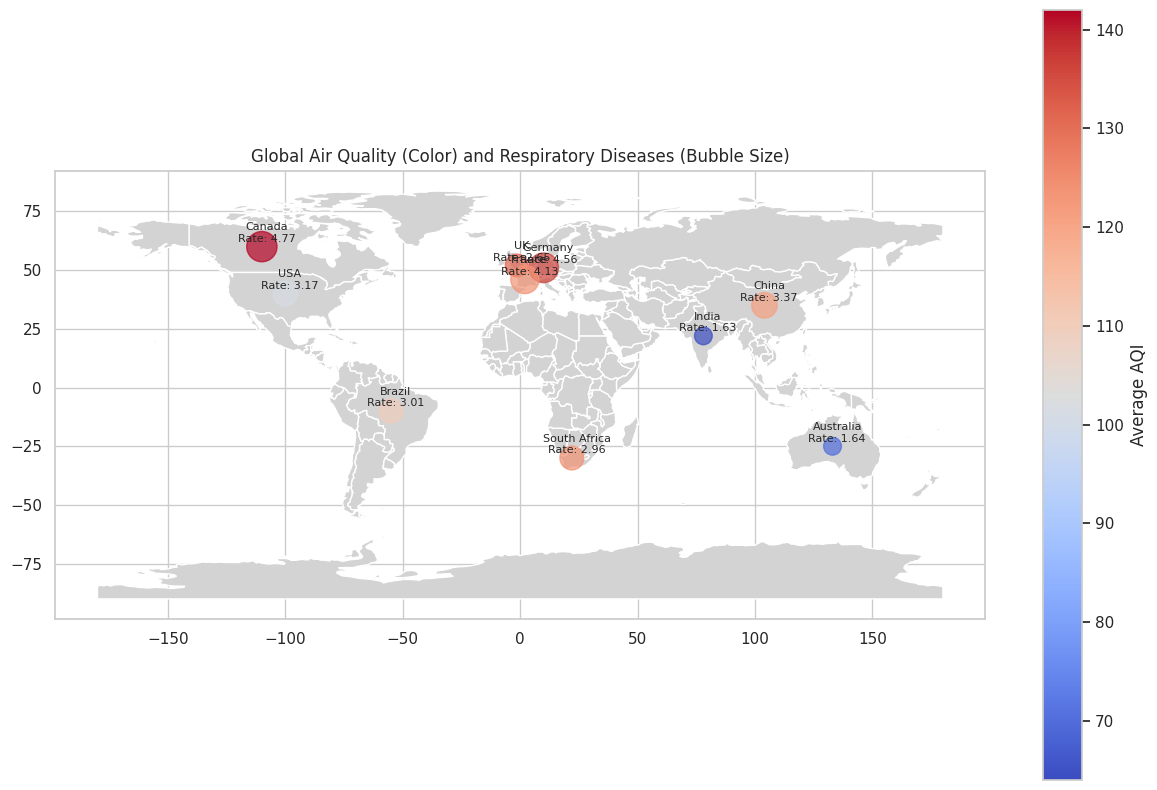

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgray')

# Plot AQI as a colored gradient and bubble sizes for respiratory disease rate
scatter = gdf.plot(
    ax=ax, 
    column="Average_AQI", 
    cmap="coolwarm", 
    markersize=gdf["Respiratory_Disease_Rate"] * 100,  # Adjust bubble size for clarity
    legend=True,
    legend_kwds={"label": "Average AQI"},
    alpha=0.7
)

# Annotate the bubbles for correct country locations
for x, y, label, rate in zip(gdf.geometry.x, gdf.geometry.y, gdf["Country"], gdf["Respiratory_Disease_Rate"]):
    ax.text(x + 2, y + 2, f"{label}\nRate: {rate:.2f}", fontsize=8, ha='center')

plt.title("Global Air Quality (Color) and Respiratory Diseases (Bubble Size)")
plt.savefig("air_quality_map.jpg")
plt.show()

# Step 4: Statistical analysis - Correlation between AQI and disease rates

In [8]:
correlation = gdf["Average_AQI"].corr(gdf["Respiratory_Disease_Rate"])
print("Correlation between Average AQI and Respiratory Disease Rate:", correlation)

Correlation between Average AQI and Respiratory Disease Rate: 0.8474982587589418


# Step 5: Visualize the correlation using Seaborn

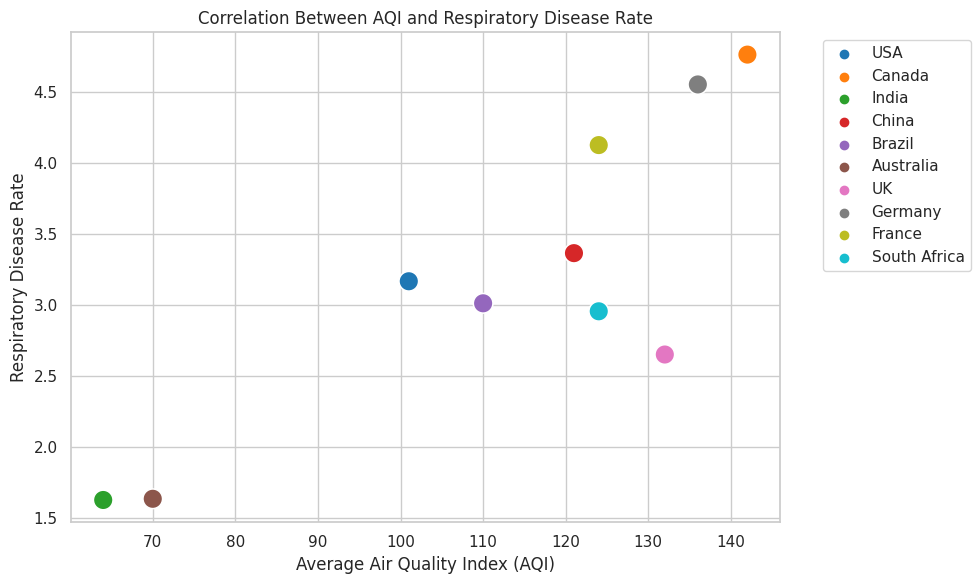

In [9]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Average_AQI",
    y="Respiratory_Disease_Rate",
    data=gdf,
    hue="Country",
    palette="tab10",
    s=200  # Larger marker size for clarity
)
plt.title("Correlation Between AQI and Respiratory Disease Rate")
plt.xlabel("Average Air Quality Index (AQI)")
plt.ylabel("Respiratory Disease Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("aqi_disease_correlation.jpg")
plt.show()

# Step 6: Summary statistics

In [10]:
summary_stats = gdf.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        Average_AQI  Respiratory_Disease_Rate   Longitude   Latitude
count    10.000000                 10.000000   10.000000  10.000000
mean    112.400000                  3.187922    8.250000  24.100000
std      26.742392                  1.078751   81.393164  33.577274
min      64.000000                  1.629561 -110.000000 -30.000000
25%     103.250000                  2.729810  -41.625000  -2.000000
50%     122.500000                  3.091915    6.000000  37.500000
75%     130.000000                  3.938021   64.000000  49.750000
max     142.000000                  4.765258  133.000000  60.000000


# Q1: Which country has the highest AQI?

In [11]:
highest_aqi_country = gdf.loc[gdf["Average_AQI"].idxmax()]
print(f"Country with the highest AQI: {highest_aqi_country['Country']} (AQI: {highest_aqi_country['Average_AQI']})")

Country with the highest AQI: Canada (AQI: 142)


# Q2: Which country has the highest respiratory disease rate?

In [12]:
highest_disease_country = gdf.loc[gdf["Respiratory_Disease_Rate"].idxmax()]
print(f"Country with the highest respiratory disease rate: {highest_disease_country['Country']} (Rate: {highest_disease_country['Respiratory_Disease_Rate']:.2f})")

Country with the highest respiratory disease rate: Canada (Rate: 4.77)


# Q3: What is the average AQI and disease rate across all countries?

In [13]:
average_aqi_global = gdf["Average_AQI"].mean()
average_disease_rate_global = gdf["Respiratory_Disease_Rate"].mean()
print(f"Global average AQI: {average_aqi_global:.2f}")
print(f"Global average respiratory disease rate: {average_disease_rate_global:.2f}")

Global average AQI: 112.40
Global average respiratory disease rate: 3.19


# Q4: Is there a significant difference between AQI levels in the northern and southern hemispheres?

In [14]:
gdf["Hemisphere"] = gdf["Latitude"].apply(lambda x: "Northern" if x >= 0 else "Southern")
northern_aqi = gdf[gdf["Hemisphere"] == "Northern"]["Average_AQI"].mean()
southern_aqi = gdf[gdf["Hemisphere"] == "Southern"]["Average_AQI"].mean()
print(f"Average AQI in the Northern Hemisphere: {northern_aqi:.2f}")
print(f"Average AQI in the Southern Hemisphere: {southern_aqi:.2f}")

Average AQI in the Northern Hemisphere: 117.14
Average AQI in the Southern Hemisphere: 101.33


# Q5: Identify the country closest to the global average AQI.

In [15]:
global_avg_aqi = gdf["Average_AQI"].mean()
closest_country = gdf.iloc[(gdf["Average_AQI"] - global_avg_aqi).abs().idxmin()]
print(f"Country closest to the global average AQI: {closest_country['Country']} (AQI: {closest_country['Average_AQI']})")

Country closest to the global average AQI: Brazil (AQI: 110)
